# Credit Card Fraud Detection::

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import pandas as pd
import numpy as np
import keras

In [2]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

# Checking Missing Values

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Splitting Data

In [7]:
data = df.iloc[:, :-1]
targets = df.iloc[:,-1]

In [8]:
print(data.shape)
print(targets.shape)

(284807, 30)
(284807,)


In [9]:
from sklearn.model_selection import train_test_split

### data Spliting

In [10]:
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=.3)

In [11]:
train_data, validation_data, train_targets, validation_targets = train_test_split(train_data, train_targets, test_size=.2)

# Standardizing Data

In [12]:
mean = np.mean(train_data)
std = np.std(train_data)


train_data -= mean
train_data /= std

validation_data -= mean
validation_data /= std

test_data -= mean
test_data /= std

# Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

In [13]:
from keras import models, layers

In [14]:
model = models.Sequential()

model.add(layers.Dense(10, input_shape=(train_data.shape[1],), activation='relu'))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

# Compilation Step

In [15]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model

In [16]:
history = model.fit(train_data, train_targets, epochs=100, validation_data=(validation_data, validation_targets))

Epoch 1/100
4985/4985 [==============================] - 25s 5ms/step - loss: 0.0430 - accuracy: 0.9986 - val_loss: 0.0066 - val_accuracy: 0.9994
Epoch 2/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0109 - accuracy: 0.9992 - val_loss: 0.0073 - val_accuracy: 0.9994
Epoch 3/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0061 - accuracy: 0.9996 - val_loss: 0.0070 - val_accuracy: 0.9994
Epoch 4/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0076 - accuracy: 0.9993 - val_loss: 0.0062 - val_accuracy: 0.9994
Epoch 5/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0067 - accuracy: 0.9995 - val_loss: 0.0053 - val_accuracy: 0.9994
Epoch 6/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0064 - accuracy: 0.9994 - val_loss: 0.0055 - val_accuracy: 0.9994
Epoch 7/100
4985/4985 [==============================] - 7s 1ms/step - loss: 0.0078 - accuracy: 0.9994 - val_loss: 0.0051 - val_a

# plots

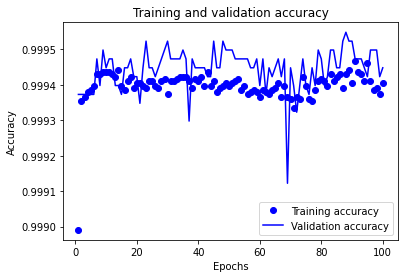

In [17]:
import matplotlib.pyplot as plt
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluation

In [18]:
model.evaluate(test_data, test_targets)

2671/2671 [==============================] - 3s 935us/step - loss: 0.0084 - accuracy: 0.9993


[0.008442030288279057, 0.9992860555648804]

## 99.9% accuracy without handling imbalanced data.... 🤔🤯

# Prediction

In [19]:
predictions = model.predict(test_data)

In [20]:
predictions.shape

(85443, 1)

In [24]:
predictions = predictions.reshape(85443)

In [27]:
output_df = pd.DataFrame({'Actual': test_targets, 'Prediction': np.round(predictions)})

In [28]:
output_df.head()

,Actual,Prediction
233727,0,0.0
264809,0,0.0
243161,0,0.0
47288,0,0.0
180822,0,0.0


In [30]:
output_df.shape

(85443, 2)

# How many correct predictions?

In [29]:
filt = (output_df.loc[:, 'Actual'] == output_df.loc[:, 'Prediction'])

output_df[filt].shape

(85382, 2)

In [31]:
print(f'Accuracy is {(output_df[filt].shape[0]/output_df.shape[0])*100}%')

Accuracy is 99.92860737567734%


# Extra Work - Imbalanced Data

-> finding ROC AUC Score

In [32]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_targets, predictions)

0.889948298351997

So, this is an excellent classifier according to this post [here](https://www.researchgate.net/post/What-is-the-value-of-the-area-under-the-roc-curve-AUC-to-conclude-that-a-classifier-is-excellent#:~:text=for%20Atomic%20Research-,What%20is%20the%20value%20of%20the%20area%20under%20the%20roc,1%20denotes%20an%20excellent%20classifier.)

-> Weighted Neural Networks

In [35]:
train_targets.value_counts()

0    159214
1       277
Name: Class, dtype: int64

There are 277 1's (frauds) and 159215 0's (non-frauds)

159215/277 = 574

0's are 574 times more than 1's

we can assign custom weights to NN accordingly

In [37]:
weights = {
    0:1,
    1:570
}

In [38]:
model = models.Sequential()

model.add(layers.Dense(10, input_shape=(train_data.shape[1],), activation='relu'))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# CHANGE
history = model.fit(train_data, train_targets, epochs=100, validation_data=(validation_data, validation_targets), class_weight=weights)

Epoch 1/100
4985/4985 [==============================] - 25s 5ms/step - loss: 2.3137 - accuracy: 0.9806 - val_loss: 0.0094 - val_accuracy: 0.9993
Epoch 2/100
4985/4985 [==============================] - 8s 2ms/step - loss: 3.1956 - accuracy: 0.9993 - val_loss: 0.0095 - val_accuracy: 0.9994
Epoch 3/100
4985/4985 [==============================] - 7s 2ms/step - loss: 1.7960 - accuracy: 0.9994 - val_loss: 0.0096 - val_accuracy: 0.9994
Epoch 4/100
4985/4985 [==============================] - 7s 2ms/step - loss: 1.8852 - accuracy: 0.9994 - val_loss: 0.0094 - val_accuracy: 0.9994
Epoch 5/100
4985/4985 [==============================] - 8s 2ms/step - loss: 2.0950 - accuracy: 0.9994 - val_loss: 0.0142 - val_accuracy: 0.9994
Epoch 6/100
4985/4985 [==============================] - 8s 2ms/step - loss: 1.5259 - accuracy: 0.9994 - val_loss: 0.0631 - val_accuracy: 0.9984
Epoch 7/100
4985/4985 [==============================] - 8s 2ms/step - loss: 1.3273 - accuracy: 0.9990 - val_loss: 0.0094 - val_a

In [39]:
predictions = model.predict(test_data)

In [40]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_targets, predictions)

0.9582468564743789

# By using Cost Sensitive/ Weighted Neural Network, the ROC AUC Score is improved from 0.88 to 0.95 (outstanding classifier)

In [41]:
model.evaluate(test_data, test_targets)

2671/2671 [==============================] - 2s 914us/step - loss: 0.0133 - accuracy: 0.9991


[0.013341130688786507, 0.9990988373756409]